In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from misc import *
%load_ext autoreload
%autoreload 2


Covariance evolution

In [9]:
covs = []
means = []

#define parameters
gamma = 1.0 #damping from outside 
Gamma = 0.8 #measurement rate
eta = 1 # measurement efficiency
n = 2 # number of photons?
w = 0.4 # hamornic oscillator freq mecanical
m = 1 # mass harmonic oscillator mechanical
T = 2*np.pi/w

C= np.diag([np.sqrt(4*eta*Gamma)]*2)

A = np.array([
    [0., 1/m],
    [-m*w**2, 0.]])

D = np.diag([gamma*(n + 0.5) + Gamma]*2)

## initial condition
su = n + 0.5 + Gamma/gamma
cov_in = np.diag([np.sqrt(1+ (16*eta*Gamma*su/gamma) -1)*gamma/(8*eta*Gamma)]*2)
x_in = np.array([1,0])


covs = [cov_in]
means = [x_in]
dt = 5e-4
tf = 50
tot_steps = int(tf/dt)

xi = lambda cov: np.dot(cov, ct(C)) #+ ct(Gamma_matrix)

for k in tqdm(range(tot_steps)):
    
    x = means[-1]
    cov = covs[-1]
    
    XiCov = xi(cov)

    #    dy = np.dot(C, x + np.dot(np.linalg.inv(C), /np.sqrt(dt)))*dt  #(np.random.randn(2)*Nt/np.sqrt(dt))
    dW = np.random.randn(2)*np.sqrt(dt)
    dx = np.dot(A, x)*dt + np.dot(XiCov,dW)
    dcov = (np.dot(A,cov) + np.dot(cov, ct(A)) + D - np.dot(XiCov, ct(XiCov)))*dt
    
    covs.append(covs[-1] + dcov)
    means.append(means[-1] + dx)

100%|██████████| 100000/100000 [00:02<00:00, 43132.37it/s]


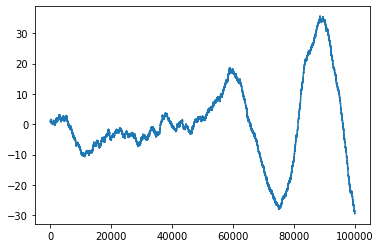

In [10]:
plt.plot([means[k][0] for k in range(len(means))])

In [11]:
covs = []
means = []

#define parameters
gamma = 1.0 #damping from outside 
Gamma = 0.8 #measurement rate
eta = 1 # measurement efficiency
n = 2 # number of photons?
w = 0.4 # hamornic oscillator freq mecanical
m = 1 # mass harmonic oscillator mechanical
T = 2*np.pi/w

C= np.diag([np.sqrt(4*eta*Gamma)]*2)

A = np.array([
    [0., 1/m],
    [-m*w**2, 0.]])

D = np.diag([gamma*(n + 0.5) + Gamma]*2)

## initial condition
su = n + 0.5 + Gamma/gamma
cov_in = np.diag([np.sqrt(1+ (16*eta*Gamma*su/gamma) -1)*gamma/(8*eta*Gamma)]*2)
x_in = np.array([1,0])


covs = [cov_in]
means = [x_in]
dt = 5e-4
tf = 500
tot_steps = int(tf/dt)

xi = lambda cov: np.dot(cov, ct(C)) #+ ct(Gamma_matrix)

for k in tqdm(range(tot_steps)):
    
    x = means[-1]
    cov = covs[-1]
    
    XiCov = xi(cov)

    #    dy = np.dot(C, x + np.dot(np.linalg.inv(C), /np.sqrt(dt)))*dt  #(np.random.randn(2)*Nt/np.sqrt(dt))
    dW = np.random.randn(2)*np.sqrt(dt)
    dx = np.dot(A, x)*dt + np.dot(XiCov,dW)
    dcov = (np.dot(A,cov) + np.dot(cov, ct(A)) + D - np.dot(XiCov, ct(XiCov)))*dt
    
    covs.append(covs[-1] + dcov)
    means.append(means[-1] + dx)

100%|██████████| 1000000/1000000 [00:23<00:00, 42545.05it/s]


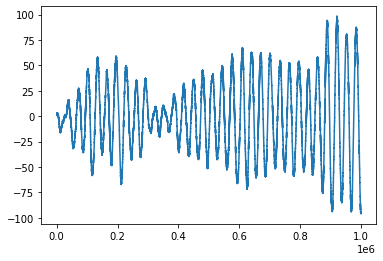

In [14]:
plt.plot([means[k][0] for k in range(len(means))])